### import necssary packages

In [1]:
import pandas as pd
import numpy as np

#### Load Data and look some 5 rows

In [2]:
Data=pd.read_csv("/home/akash/Tweeter Mining/output_got.csv")

In [2]:
Data=pd.read_csv("/home/akash/Tweeter Mining/Twitter_data_master_final_months.csv")

/home/akash/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Data.head()

,username,date,month,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,ajit4onlyu,16-02-2017 18:48,February,0,0,Thanks to demonitisation and predatory pricing...,NaN,@narendramodi,NaN,8.32E+17,https://twitter.com/ajit4onlyu/status/83221756...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TheNaveenReddy,16-02-2017 17:43,February,4,1,LMAO .. demonitisation gave a new lease of lif...,NaN,NaN,NaN,8.32E+17,https://twitter.com/TheNaveenReddy/status/8322...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,khanstudygroup,16-02-2017 17:21,February,1,0,KSG EXCLUSIVE INSIGHT - THE DEMONITISATION EFF...,NaN,NaN,NaN,8.32E+17,https://twitter.com/khanstudygroup/status/8321...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Payals2012,16-02-2017 16:59,February,0,0,@RoflGandhi_ @iamsrktheking jub Demonitisation...,NaN,@RoflGandhi_ @iamsrktheking,NaN,8.32E+17,https://twitter.com/Payals2012/status/83219009...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TejBahadurYadaa,16-02-2017 16:40,February,0,0,@timesofindia @narendramodi yes indeed true th...,NaN,@timesofindia @narendramodi,#Demonitisation,8.32E+17,https://twitter.com/TejBahadurYadaa/status/832...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
load 

UsageError: Missing filename, URL, input history range, macro, or element in the user namespace.


In [4]:
Temp=[Data["date"],Data["text"]]
Tweets_WithDate=pd.DataFrame(data=Temp).T

In [5]:
Tweets_WithDate.head()
Tweets_WithDate.shape

(79192, 2)

In [6]:
Tweets_WithDate["text"]=Tweets_WithDate["text"].str.lower()

In [7]:
Tweets_WithDate.head()

,date,text
0,16-02-2017 18:48,thanks to demonitisation and predatory pricing...
1,16-02-2017 17:43,lmao .. demonitisation gave a new lease of lif...
2,16-02-2017 17:21,ksg exclusive insight - the demonitisation eff...
3,16-02-2017 16:59,@roflgandhi_ @iamsrktheking jub demonitisation...
4,16-02-2017 16:40,@timesofindia @narendramodi yes indeed true th...


Creating Bag of Words for our classes.

In [8]:
Gov_Ann = ["Goverenment of India", "GOI", "Prime Minister’s Office", "PMOindia", "Prime Minister", "PM", "Narendra Modi", "Modi", "Reserve Bank of India", "RBI", "Mint Street", "Dr. Urjit Patel", "Urjit Patel", "Urjit", "Dr. Raghuram Rajan", "Raguram Rajan", "Rajan", "R3", "Parliament", "Parliamentary", "Parliamentary Committee", "Standing Committee on Finance", "Standing Committee", "Finance Ministry", "Ministry of Finance", "Finance Minister", "FM", "Arun Jaitley", "Jaitley", "Ministry of Commerce and Industry", "Ministry of Commerce", "Commerce Ministry", "Commerce Minister", "Nirmala Sitharaman", "Nirmala", "Niti Aayog", "Planning Commission", "Arvind Panagariya", "Bibek Debroy", "Chief Economic Adviser", "Economic Adviser", "Economic Advisor", "Arvind Subramanian", "Piyush Goyal", "All India Radio", "AIR", "Doordarshan", "Prasar Bharti", "Ministry of Information and Broadcasting", "Mann ki Baat", "Central Board of Direct Taxes", "CBDT", "Enforcement Directorate", "ED", "CBI", "FEMA"]
Reason1_FakeC = ["surgical strike", "illegal activity", "action taken", "security issues", "security", "Pakistan", "Pakistani", "Islamabad", "Bangladesh", "terrorism", "Islamic terrorism", " religious terrorism", "terror", "terror trail", "terror finance", "Islamic fundamentalism", "Muslim fundamentalism", "religious fundamentalism", "border", "pilferage", "security features", "counterfeit", "fake", "illicit", "counterfeit money", "counter"]
Reason2_BlackM = ["blackmoney", "black economy", "black wealth", "kaladhan", "shadow economy", "parallel economy", "informal economy", "concealing", "benami", "hoarding", " Income Declaration Scheme", "raids", "seizures", "seized", "undisclosed income", "money laundering"]
Reason3_CashL = ["Cashless", "cash less", "less cash", "payment systems", "retail payments", "POS", "cards", "Pay TM", "mobile payment", "United Payment Interface", "UPI", "swipe machines", "e-payment", "internet banking", "cardless", "gateway"]
Pol_Parties = ["Bhartiya Janata Party", "BJP", "Narendra Modi", "Indian National Congress", "congress", "INC", "BJP Spokesperson", "Congress Spokesperson", "Rahul Gandhi", "Manmohan Singh", "MMS", "Sashi Tharoor", "Randeep Surjewala", "Chidambaram", "Aam Aadmi Party", "AAP", "Arvind Kejriwal", "Kejriwal", "Mamata Banerjee", "Mamata", "Derek", "Nitish Kumar", "Nitish", "Mulayam", "Akhilesh", "Nitish", "Lalu Yadav", "Lalu", "Sitaram Yechuri", "Vijayan", "Election Commission", "Election Commissioner", "High Court", "Supreme Court", "Courts", "public interest litigation", "PIL"]
Media_Reactions = ["Indian Express", "Financial Express", "Times of India", "ToI", "Economic Times", "ET", "Zee", "New Delhi Television", "NDTV", "Anandabazar", "ABP", "India Today", "The Hindu", "Hindustan Times", "HT", "Mint", "Sun", "rediff.com", "Firstpost", "Sun", "UTV", "CNBC", "Times Now", "Dainik Jagran", "Divya Bhaskar", "The Wire", "Economist", "Fianancial Times", "New York Times", "Forbes", "Wall Street", "BBC", "CNN", "Bloomberg", "CMIE", "IndiaSpend", "Indicus", "Rediff", "Newslaundry", "Quint", "Quora", "The Guardian"]
Support = ["NAMO", "Modiji", "President", "Pranab Mukherjee", "Kailash Satyarthi", "crackdown", "long term", "banks", "bankers", "bank chairman", "Arundhuti", "Chanda Kochher", "Anand Mahindra", "Jindal", "Kunal Bahl", "mobile payment", "Pay TM", "Vijay Shankar", "Narayan Murthy", "Baba Ramdev", "Ramdev", "Sri Sri Ravi Shankar", "Sri Sri", "Cjhandrababu Naidu", "Pay TM", "GST", "Quraishi", "IMF", "Global Times", "Jyrki Katainen", "Justin Rowlatt", "Venezuala", "The Independent", "Lee Kuan", "Amitabh Baccchan", "Amitabh", "Aishwarya Rai", "J&K", "stone pelting", "hawala", "trafficking", "Naxalites", "Maoists", "E-commerce", "ecommerce", "raids", "seizures", "tax collection"]
Criticism = ["Bhakt", "shortage", "long queues", "lengthy queue", "lengthy queues", "disruption", "slowdown", "muddled", "muzzled", "poorly planned", "poor planning", "poorly executed", "poor execution", "protest", "protests", "litigation", "strikes", "bandh", "dharna", "rally", "Akrosh Diwas", "crash", "crashed", "closed", "short term", "severe", "detrimental", "death", "deaths", "inconvenience", "rush", "growth", "GDP growth", "plunder", "loot", "bullion", "gold", "jewellery", "real estate", "86", "blood", "circulation", "six months", "leak", "leakage", "scam", "SBI", "Sanjeev Kamboj", "Akila", "Cabinet meeting", "signature", "tourism", "carpet bomgin", "Amartya Sen", "Kaushik Basu", "Subramaniam Swamy", "Arun Shourie", "Pronab Sen", "Prabhat Patnaik", "Ninan", "Deepak Parekh", "Steve Forbes", "Krugman", "Harvard Business Review", "Hitler", "shutdown", "loss", "manpower", "emergency", "Indira", "vegetables", "rot", "dump", "farmers", "farming", "small industries", "SME", "difficulties", "violence", "thrashing", "transportation", "truck", "toll", "rabi", "harvest", "unsold", "drop", "backdated entries"]

Converting the bag of words to lowercase. This will help when we compare the keywords with the tweets.

In [9]:
def lowerList(List):
    lower = []
    for i in List:
        i = i.lower()
        lower.append(i)
    return lower
Classes = [Gov_Ann, Reason1_FakeC, Reason2_BlackM, Reason3_CashL, Pol_Parties, Media_Reactions, Support, Criticism]
print(type(Classes))
Classes = [lowerList(Class) for Class in Classes]

<type 'list'>


Creating a dictionary of the keywords in each class. Storing in dictionary format helps in executing some of the functions later.


In [10]:

Classes_Dict = {
    'Gov_Ann': Classes[0],
    'Reason1_FakeC': Classes[1],
    'Reason2_BlackM': Classes[2],
    'Reason3_CashL': Classes[3],
    'Pol_Parties': Classes[4],
    'Media_Reactions': Classes[5],
    'Support': Classes[6],
    'Criticism': Classes[7]
}    

Creating dictionary that will store the numeric value of the number of tweets belonging to each class. The function below it 
will calculate the count of the tweets. This tweet count for each class will be stored in the count dictionary as values


In [11]:
count = {
         'Gov_Ann': 0,
         'Reason1_FakeC': 0,
         'Reason2_BlackM': 0,
         'Reason3_CashL': 0,
         'Pol_Parties': 0,
         'Media_Reactions': 0,
         'Support': 0,
         'Criticism': 0
        }

# The below function does two things. 

1) It gives us the count of the number of tweets belonging to each class (Stored in the
dictionary called count). 

2) And it also creates a dictionary which will have name of the classes as keys, and all the tweets belonging to it as values. 
The tweets have been cleaned. Full stops, exclamation marks, etc. have been removed from them. This will allow us to match 
words in a more accurate manner (Eg. 'demonetisation!' will not be read to be equal to 'demonetisation' if we do not do so).

In [179]:

import re

def clean_tweets(tweets):
    Tweets = {
     'Gov_Ann': [],
     'Reason1_FakeC': [],
     'Reason2_BlackM': [],
     'Reason3_CashL': [],
     'Pol_Parties': [],
     'Media_Reactions': [], 
     'Support': [],
     'Criticism': []
    }
    for tweet in tweets:
        clean_tweet = tweet.strip('.' '!' '?' ')' '(' '#' ',' ':' '-').lower()
        #clean_tweet = re.sub(r'^https?:\/\/.*[\r\n]*', '', clean_tweets, flags=re.MULTILINE)
        clean_tweet=re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+','',tweet,
                          flags=re.MULTILINE)
        clean_tweet=re.sub(r'<[^>]+>','',clean_tweet,flags=re.MULTILINE)
        clean_tweet=re.sub(r"http\S+", "", clean_tweet)
        for word in clean_tweet.split():
            for Class in Classes_Dict:
                if word in Classes_Dict[Class]:
                    count[Class] = count[Class] + 1
                    Tweets[Class].append(clean_tweet)
    return count

The Tweets variable is a dictionary. It has names of the classes as keys and all the tweets belonging to the class as values.

In [180]:
Tweets=clean_tweets(Tweets_WithDate['text'])

In [181]:
Tweets['Criticism']

77155

In [182]:
Tweets_monthwise=list(Data['text'].groupby(Data['month']))
#Tweets_monthwise=pd.DataFrame(Tweets_monthwise,columns=['month','tweets'])
#Tweets_monthwise[0]=list(Tweets_monthwise[0])
#Tweets_monthwise=[list(Tweets_monthwise[i]) for i in range(len(Tweets_monthwise))]
#Tweets_monthwise

In [183]:
#for 
Tweets_monthwise1_februray=pd.DataFrame(Tweets_monthwise[1][1])
Tweets_monthwise1_Decemeber=pd.DataFrame(Tweets_monthwise[0][1])
Tweets_monthwise1_January=pd.DataFrame(Tweets_monthwise[2][1])
Tweets_monthwise1_November=pd.DataFrame(Tweets_monthwise[3][1])

In [172]:
#Tweets_monthwise[1][1]

0       Thanks to demonitisation and predatory pricing...
1       LMAO .. demonitisation gave a new lease of lif...
2       KSG EXCLUSIVE INSIGHT - THE DEMONITISATION EFF...
3       @RoflGandhi_ @iamsrktheking jub Demonitisation...
4       @timesofindia @narendramodi yes indeed true th...
5       @timesofindia @narendramodi . You should loose...
6       @IndiaToday @manogyaloiwal Demonitisation has ...
7       Say Bye bye to demonitisation woes. With @mast...
8       BJP is feeling like Mayawati did post demoniti...
9       Say goodbye to demonitisation woes. With @mast...
10      All Thanks to @mastercardindia for helping us ...
11      @mastercardindia is doing a great job at helpi...
12      @mastercardindia Kudos for helping us cope wit...
13      pic.twitter.com/d4UESVXoBR and these assholes ...
14      @mastercardindia Kudos for helping us cope wit...
15      Demonitisation could potentially be a mega and...
16      . @mastercardindia is doing a great job at hel...
17      @Times

In [82]:
#Tweetr=pd.DataFrame(Tweets_monthwise[0])

In [83]:
#list(Data.groupby(Data['month']))

In [84]:
#Tweetr

,0
0,December
1,6576 @PMOIndia Mr PM such freebies after H...


In [184]:
Tweets_February=clean_tweets(Tweets_monthwise1_februray['text'])
Tweets_December=clean_tweets(Tweets_monthwise1_Decemeber['text'])
Tweets_January=clean_tweets(Tweets_monthwise1_January['text'])
Tweets_November=clean_tweets(Tweets_monthwise1_November['text'])


In [185]:
CristisimTweets=[Tweets_November['Gov_Ann'],Tweets_December['Gov_Ann'],Tweets_January['Gov_Ann'],
                Tweets_February['Gov_Ann']]

In [187]:
# This is classwise tweets, but we are getting same count for each class
CristisimTweets

[74989, 74989, 74989, 74989]

The below function calculates word count for words in each class. It creates a dictionary with class names as keys. Within each 
key, the value contains another dictionary. This dictionary contains word as key and its count as value.

In [18]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')

def classwordcount(Tweets):
    stop_words = get_stop_words('en')
    stop_words.extend(['-', '&', '…', '', '–', 'http://','goo.gl' ':', ',', ':'])
    ClassWordCount = {
        'Gov_Ann': {},
        'Reason1_FakeC': {},
        'Reason2_BlackM': {},
        'Reason3_CashL': {},
        'Pol_Parties': {},
        'Media_Reactions': {}, 
        'Support': {},
        'Criticism': {}
    }
 
    for Class in Tweets:
        for word in Tweets[Class]:
            word = word.split()
            for w in word:
                if w not in stop_words:
                    if w not in ClassWordCount[Class]:
                        ClassWordCount[Class][w] = Tweets[Class].count(w)
                    else:
                        ClassWordCount[Class][w] = ClassWordCount[Class][w] + 1
    return ClassWordCount

In [19]:
ClassWordCount=classwordcount(Tweets)

/home/akash/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Here, we are defining a new function which will help us sort our newly created dictionary of word counts from the previous 
function. Therefore, words with maximum counts/occurences will appear first followed by those occuring less frequently.

In [20]:
def sortDict(dic):
    return [(word, dic[word]) for word in sorted(dic, key=dic.__getitem__, reverse=True)]    

Here, we are not just using the above function to sort the word count dictionary. But also converting the same into a Dataframe.
Dataframe offers many advantages over dictionary format which we will see ahead.

In [21]:
Gov_Ann_WC_S = pd.DataFrame(data=sortDict(ClassWordCount['Gov_Ann']), columns=["Word", 'Count'])
Reason1_FakeC_WC_S = pd.DataFrame(data=sortDict(ClassWordCount['Reason1_FakeC']), columns=["Word", 'Count'])
Reason2_BlackM_WC_S = pd.DataFrame(data=sortDict(ClassWordCount['Reason2_BlackM']), columns=["Word", 'Count'])
Reason3_CashL_WC_S = pd.DataFrame(data=sortDict(ClassWordCount["Reason3_CashL"]), columns=["Word", 'Count'])
Pol_Parties_WC_S = pd.DataFrame(data=sortDict(ClassWordCount["Pol_Parties"]), columns=["Word", 'Count'])
Media_Reactions_WC_S = pd.DataFrame(data=sortDict(ClassWordCount["Media_Reactions"]), columns=['Word', 'Count'])
Support_WC_S = pd.DataFrame(data=sortDict( ClassWordCount["Support"]), columns=["Word", 'Count'])
Criticism_WC_S = pd.DataFrame(data=sortDict(ClassWordCount['Criticism']), columns=["Word", 'Count'])

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
Month_tweets=Data['text'].groupby(Data["month"]).count()
print Month_tweets
Month_tweets=Month_tweets.sort_values(ascending=False)

month
December    14991
February     1580
January      4996
November    57625
Name: text, dtype: int64


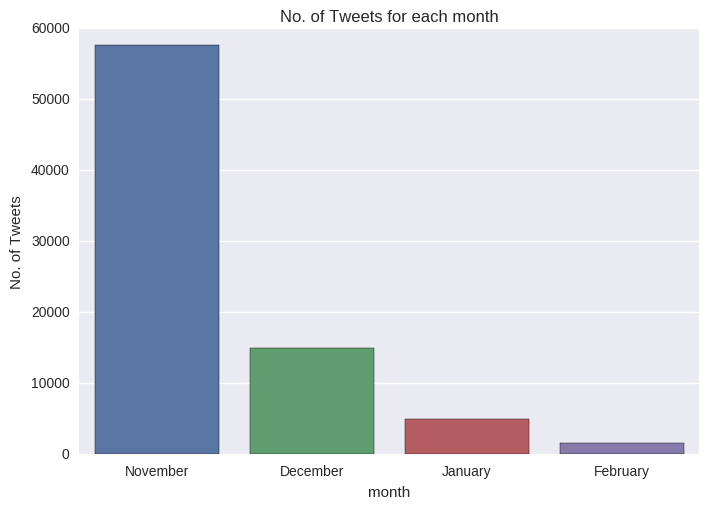

In [24]:
import seaborn as sns
x=["November","December","January","Feb"]
b=sns.barplot(Month_tweets.index,y=Month_tweets.values)
b.set_title('No. of Tweets for each month')
b.set_xlabel("month")
b.set_ylabel("No. of Tweets")

In [25]:
Tweet

NameError: name 'Tweet' is not defined

In [26]:
sorted(count, key=count.get, reverse=True)

['Gov_Ann',
 'Criticism',
 'Pol_Parties',
 'Support',
 'Reason1_FakeC',
 'Reason3_CashL',
 'Media_Reactions',
 'Reason2_BlackM']

In [27]:
Tweets_per_class=[]
Classes1 = ['Reason2_BlackM', 'Reason1_FakeC', 'Media_Reactions', 'Reason3_CashL', 'Support', 'Pol_Parties', 'Criticism', 'Gov_Ann']
for Class in Classes1:
    Tweets_per_class.append(len(Tweets[Class]))

Tweets_per_class
len(Tweets['Reason2_BlackM'])

491

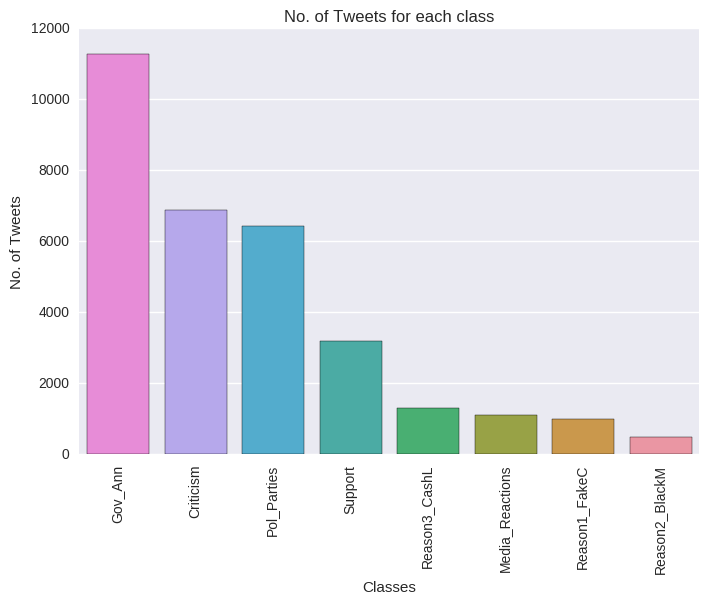

In [28]:
import seaborn as sns
Classes1 = ['Reason2_BlackM', 'Reason1_FakeC', 'Media_Reactions', 'Reason3_CashL', 'Support', 'Pol_Parties', 'Criticism', 'Gov_Ann']
_ROTATION_DEGREES = 90
b=sns.barplot(x=Classes1,y=np.sort(list(Tweets_per_class)))
b.set_xticklabels(Classes1, rotation=_ROTATION_DEGREES)
b.set_title('No. of Tweets for each class')
b.set_xlabel("Classes")
b.set_ylabel("No. of Tweets")
b.invert_xaxis()

In [ ]:
#A=Tweets['Criticism'][0]
#weets_WithDate[Data['text']==A]
Tweets_WithDate['only_date'] = pd.DatetimeIndex(Tweets_WithDate['date']).date
Tweets_WithDate.head()
tweets_date=Tweets_WithDate.groupby(['only_date']).count()
tweets_date['text'].head()
df['col']=Twee

In [ ]:
tweetwords = [Tweets_WithDate['text'][i].split() for i in range(len(Tweets_WithDate)) ]

In [ ]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')
stop_words.extend(['-', '&', '…', '', '–', 'http://', ':', ',', ':'])

In [ ]:

def wordcount(tweets):
    wordcount = {}
    for tweet in tweets:
        for word in tweet:
            clean_word = word.strip('.' '!' '?' ')' '(' '#' ',' ':').lower()
            clean_word = re.sub(r'^https?:\/\/.*[\r\n]*', '', clean_word, flags=re.MULTILINE)
            
            if clean_word not in stop_words:
                if clean_word not in wordcount:
                    count = tweet.count(word)
                    wordcount[clean_word] = count
                else:
                    wordcount[clean_word] = wordcount[clean_word] + 1
    return wordcount
                
                
            
            

In [264]:
wordCount = wordcount(tweetwords)


/home/dharma/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [265]:
maxcount = [(word, wordCount[word]) for word in sorted(wordCount, key=wordCount.get, reverse=True)]

In [266]:
Tweets_WithDate['only_date'] = pd.DatetimeIndex(Tweets_WithDate['date']).date

In [270]:
tweets_date=Tweets_WithDate.groupby(['only_date']).count()
tweets_date['text'].head()

only_date
2016-01-12    715
2016-02-12    704
2016-03-12    857
2016-04-12    601
2016-05-12    391
Name: text, dtype: int64

In [273]:
Tweets_WithDate['only_date'].sub.head()

0    2017-02-16
1    2017-02-16
2    2017-02-16
3    2017-02-16
4    2017-02-16
Name: only_date, dtype: object

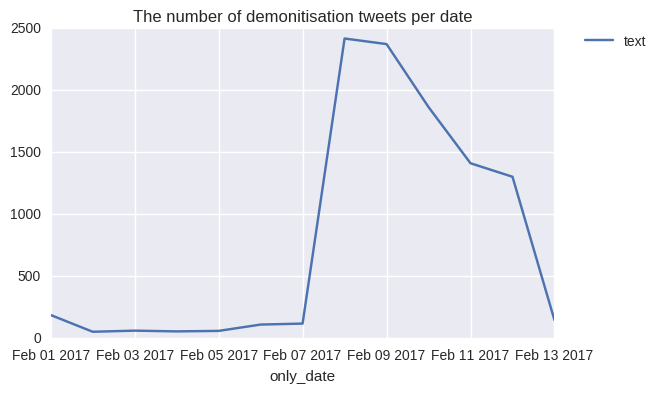

In [180]:
import seaborn as sns
tweets_date['text'].transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of demonitisation tweets per date')

In [162]:
Tweets_WithDate.head()

,date,text,only_date
0,2017-02-13 05:27,farmers hit hard as tur dal traders shut shop ...,2017-02-13
1,2017-02-13 05:19,note ban most disruptive policy innovation sin...,2017-02-13
2,2017-02-13 05:16,"after demonetisation , digital deluge, banks s...",2017-02-13
3,2017-02-13 05:14,rbi to declare 'verified' figure on post- demo...,2017-02-13
4,2017-02-13 05:14,‘we’ll show them what it means to be cashless’...,2017-02-13
